Что такое Colab?
Colaboratory, или просто Colab, позволяет писать и выполнять код Python в браузере. При этом:

не требуется никакой настройки;
бесплатный доступ к графическим процессорам;
предоставлять доступ к документам другим людям очень просто.
Это отличное решение для студентов, специалистов по обработке данных и исследователей в области искусственного интеллекта. Чтобы узнать больше, посмотрите ознакомительное видео или начните работу с инструментом ниже.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("Hello, Google Colab!")

Hello, Google Colab!


In [ ]:
from random import *

nums = [randint(1, 100) for i in range(10)]
print(nums)

def sumarr(arr):
  return sum(arr)

print(sumarr(nums))


[70, 22, 28, 61, 82, 13, 10, 17, 4, 72]
379


In [ ]:
import numpy as np

nums = np.random.randint(1, 100, 20)
print(nums)

def avgarr(arr):
  return sum(arr) / len(arr)

print(avgarr(nums))


[15 68 79  6 66 36 72 23 21 91 30 79 60 16 61 28 89 42 59 23]
48.2


In [ ]:
import pandas as pd

csvf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test.csv', sep=',')

csvf[:5]


,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,BDCQ.SEA1AA,2011.06,80078,NaN,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,NaN,NaN
1,BDCQ.SEA1AS,2011.06,83851,NaN,R,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Seasonally adjusted,NaN,NaN
2,BDCQ.SEA1AT,2011.06,83962,NaN,R,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Trend,NaN,NaN
3,BDCQ.SEA1BA,2011.06,5234,NaN,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,Mining,Actual,NaN,NaN
4,BDCQ.SEA1BS,2011.06,5234,NaN,R,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,Mining,Seasonally adjusted,NaN,NaN


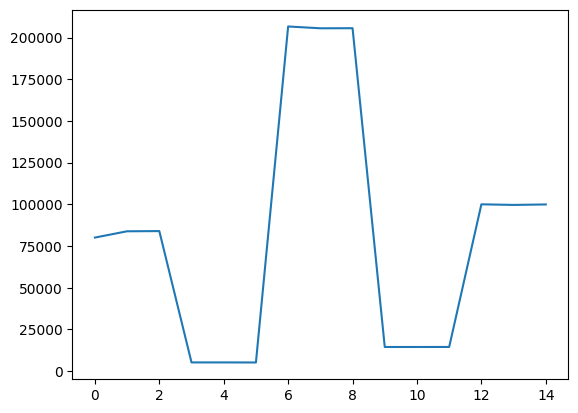

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csvf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test.csv', sep=',')

plt.plot(csvf['Data_value'])

In [2]:
import random

# Количество особей в каждом поколении
POPULATION_SIZE = 1000

# Валидные гены
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдеёжзийклмнопрстуфхцчшщъыьэюя 1234567890
, .-;:_!"#%&/()=?@${[]}'''

# Целевая строка для генерации
TARGET = "Класс, представляющий отдельную особь (индивида) в популяции 2000"

class Individual(object):
	'''
	Класс, представляющий отдельную особь (индивида) в популяции
	'''
	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):
		'''
		Создаем случайные гены для мутации
		'''
		global GENES
		gene = random.choice(GENES)
		return gene

	@classmethod
	def create_gnome(self):
		'''
		Создаем хромосому или набор генов
		'''
		global TARGET
		gnome_len = len(TARGET)
		return [self.mutated_genes() for _ in range(gnome_len)]

	def gene_transfer(self, par2):
		'''
		Передаем гены новому поколению индивидов
		'''

		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			prob = random.random()

			# если вероятность меньше 0,45, берем ген
			# от родителя 1
			if prob < 0.45:
				child_chromosome.append(gp1)

			# если вероятность между 0.45 и 0.90, берем
			# ген от родителя 2
			elif prob < 0.90:
				child_chromosome.append(gp2)

			# в противном случае берем случайный ген (мутация),
			else:
				child_chromosome.append(self.mutated_genes())


		return Individual(child_chromosome)

	def cal_fitness(self):
		'''
		Рассчитываем показатель соответствия, это количество
		символов в строке, которые отличаются от целевой
		строки.
		'''
		global TARGET
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET):
			if gs != gt: fitness+= 1
		return fitness

# Driver code
def main():
	global POPULATION_SIZE

	#Текущее поколение
	generation = 1

	found = False
	population = []

	# Новое поколение
	for _ in range(POPULATION_SIZE):
				gnome = Individual.create_gnome()
				population.append(Individual(gnome))

	while not found:

		# Отсортируем популяцию в порядке возрастания оценки соответствия целевой функции
		population = sorted(population, key = lambda x:x.fitness)

		# Если у нас появился индивид, достигший целевой функции
		# цикл совершенствования можно прервать
		if population[0].fitness <= 0:
			found = True
			break

		# В противном случае - продолжаем создавать новые поколения
		new_generation = []

		# Определяем 10% популяции, наиболее соответствующих целевой фукнции
		# чтобы передать их гены будущим поколениям
		s = int((10*POPULATION_SIZE)/100)
		new_generation.extend(population[:s])


		s = int((90*POPULATION_SIZE)/100)
		for _ in range(s):
			parent1 = random.choice(population[:50])
			parent2 = random.choice(population[:50])
			child = parent1.gene_transfer(parent2)
			new_generation.append(child)

		population = new_generation

		print("Generation: {}\tString: {}\tFitness: {}".
			format(generation,
			"".join(population[0].chromosome),
			population[0].fitness))

		generation += 1


	print("Generation: {}\tString: {}\tFitness: {}".
		format(generation,
		"".join(population[0].chromosome),
		population[0].fitness))

if __name__ == '__main__':
	main()

Generation: 1	String: НлаKA5о{ш.oIгБ;!дisn3й4 GюпсQАeсРDц=jOъPн?m"Ьз;!гЯ_ЗюпЛn 8чЩaY0ъщ	Fitness: 60
Generation: 2	String: НлаKA5о{ш.oIгБ;!дisn3й4 GюпсQАeсРDц=jOъPн?m"Ьз;!гЯ_ЗюпЛn 8чЩaY0ъщ	Fitness: 60
Generation: 3	String: злкKv"опк,o
ЦЭтсдюCВ3до NяЖeя$%"}сЭЛjwЫВн%цЭхзЖЕгm 3Рпцe;Шч2aY5kщ	Fitness: 57
Generation: 4	String: ]лаIv Л%xЗцuть;dфYYКй0VYGГвФ)$ЪБас бЕЧ(0н%ц@эдаТ{w?vюпЛе ЙПЩq_и У	Fitness: 54
Generation: 5	String: jлаiэ,toШPХстOK!f; .йEАuыГGсdЧ%DРеJШkо(
ндб!;даТ K Зs03#u#йc (0jз	Fitness: 50
Generation: 6	String: Нласо, п[еvКRИХ3ЖюKgкР4ьNюпбс,#ZГпуАВПъHнди"SдаТ Я
3PпЩ##Ы]и M5з0	Fitness: 47
Generation: 7	String: ЗxаЮо, пЦеИКравPяю&эй/?тKжWeчу}пdсёбxw(%жд
"Лдд) 7
ГогЛr;цйижoЦv5	Fitness: 43
Generation: 8	String: Нуасa, пpеЗёЙ,Б!ЖюЦийiотu(W?иЧю 8щуqkr(
ндиU%да)г[ Йо0Щ#uЩйи M0jШ	Fitness: 40
Generation: 9	String: Нласс, пpеУёЙ,БюяюЁийWотK(ц?иЧю cДLбВM(вндЬUSpа)щ[ Бо0Ще Щeи M0ъ9	Fitness: 38
Generation: 10	String: Аласо, п}еИ
RlвVяi&ий оb-Qпnчущ !сГбx (вSдавЛдк) % ГопЛл цти o0Dт	Fitness: 33